In [1]:
from google.colab import files
uploaded = files.upload()


Saving Amazon.csv to Amazon.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df= pd.read_csv('Amazon.csv') 

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6150,2021-10-21,3414.25000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.00000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.00000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.51001,3416.120117,3343.979980,3376.070068,3376.070068,2693700
6154,2021-10-27,3388.00000,3412.000000,3371.453369,3396.189941,3396.189941,1080291


In [6]:
df.shape

(6155, 7)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


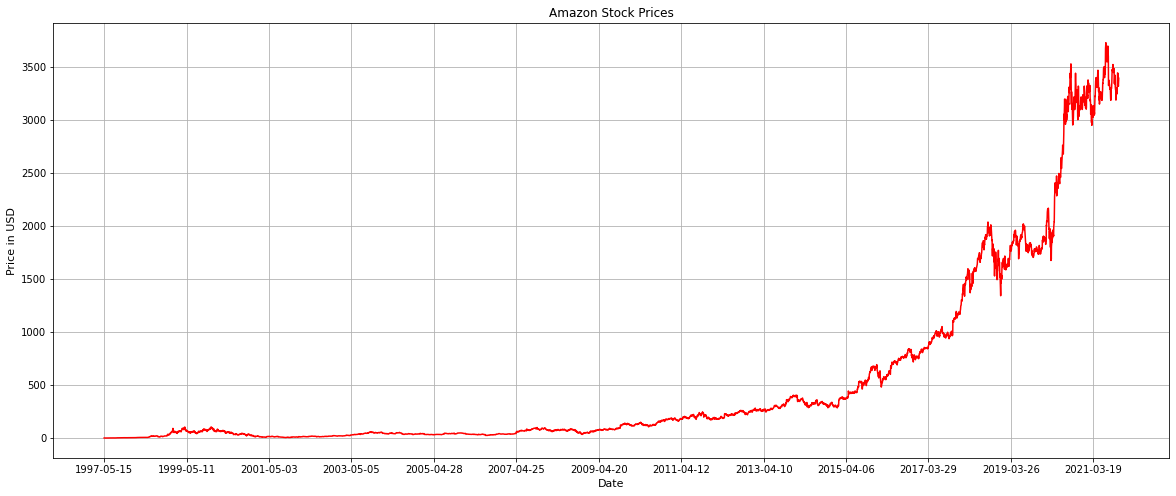

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

Here we have created Line plot which is showing the growth of Amazon stock price

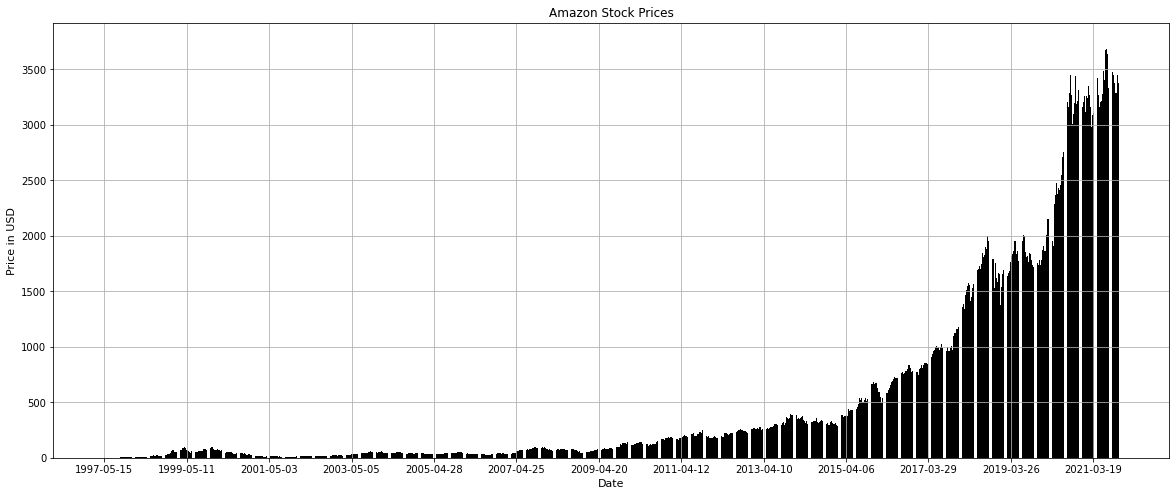

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['Close'], color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

Bar plot of amazon stock data 

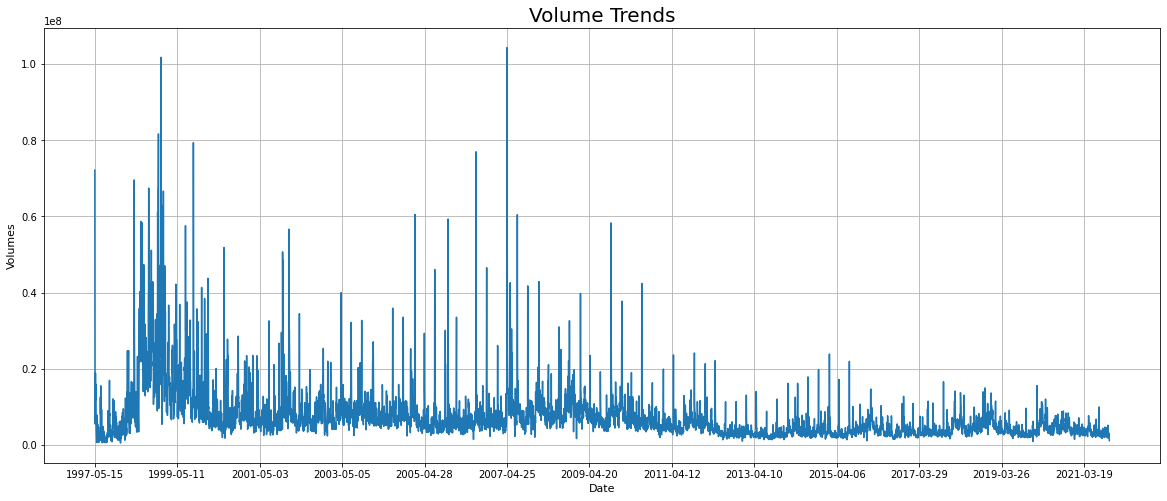

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()


In [14]:
df['Market Cap'] = df['Open']*df['Volume']

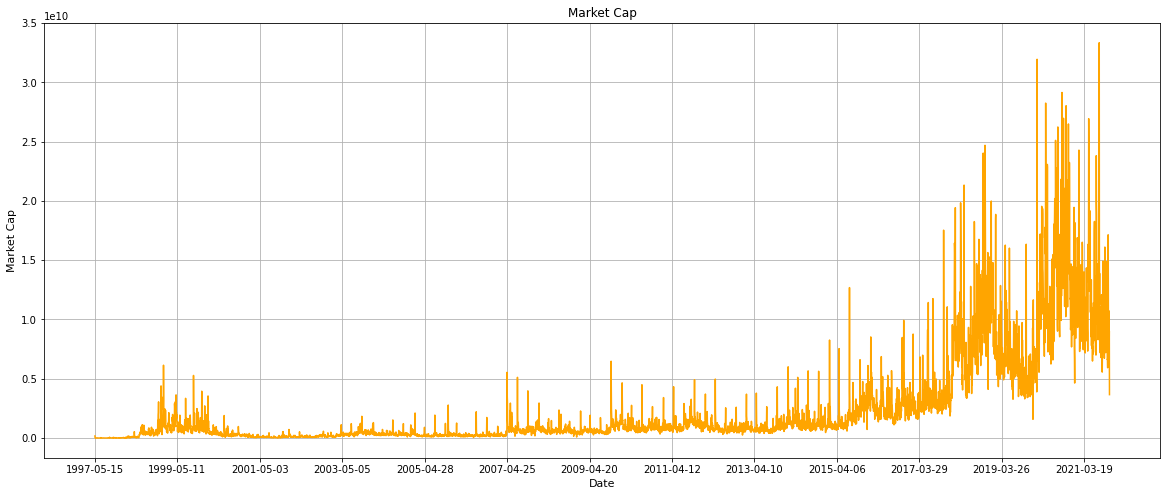

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [16]:
df.iloc[df['Market Cap'].argmax()]


Date                2021-07-30
Open               3347.949951
High               3368.139893
Low                 3306.97998
Close              3327.590088
Adj Close          3327.590088
Volume                 9957100
Market Cap    33335872457.1021
Name: 6092, dtype: object

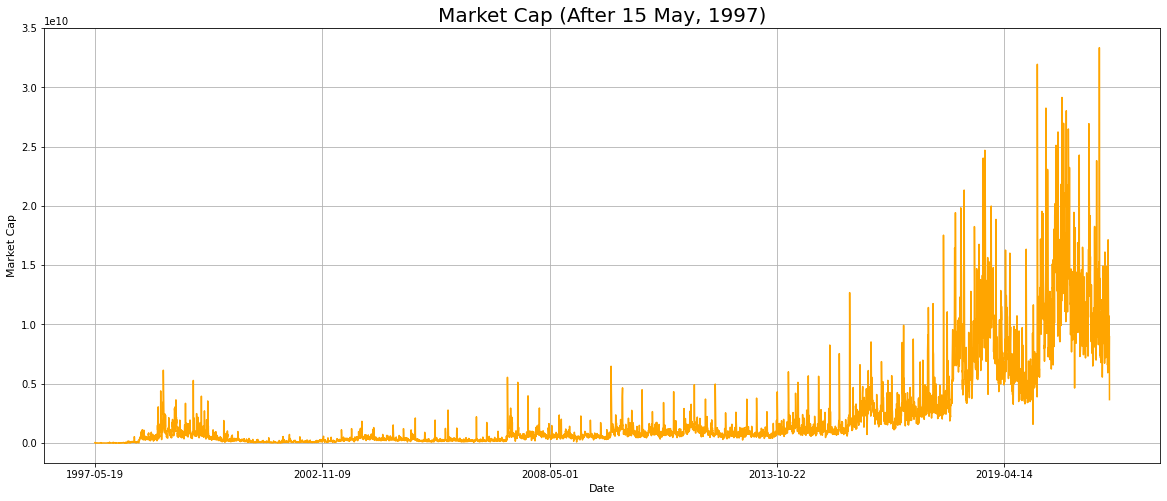

In [17]:
ohlc = df[(df['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 
 'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 15 May, 1997)', fontsize='20')
plt.show()

In [18]:
df['vol'] = (df['Close']/df['Close'].shift(1)) - 1

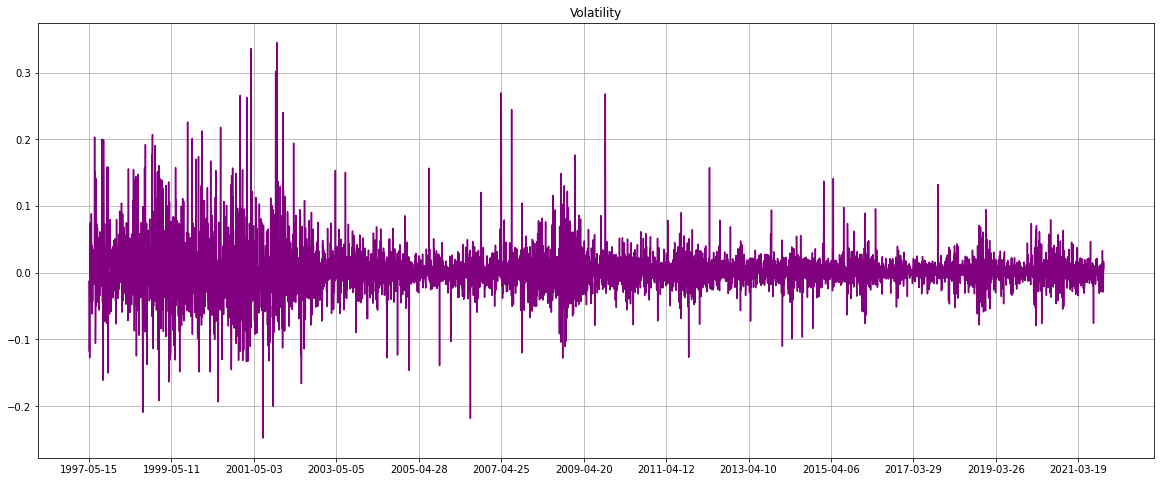

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()


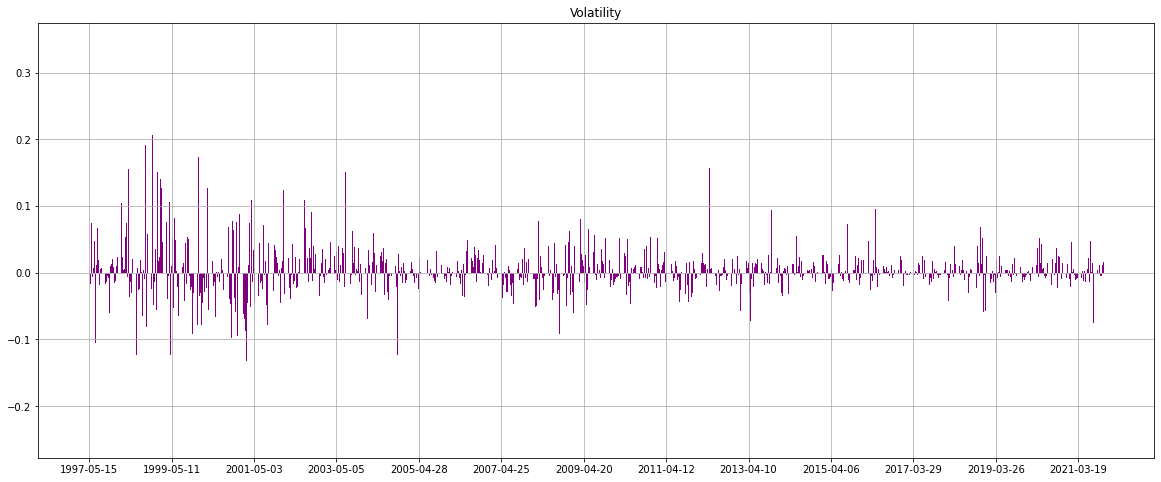

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

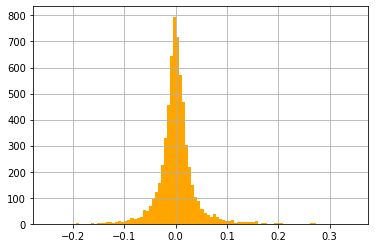

In [21]:
df['vol'].hist(bins=100, color='orange');


In [22]:
df['Cumulative Return'] = (1 + df['vol']).cumprod()


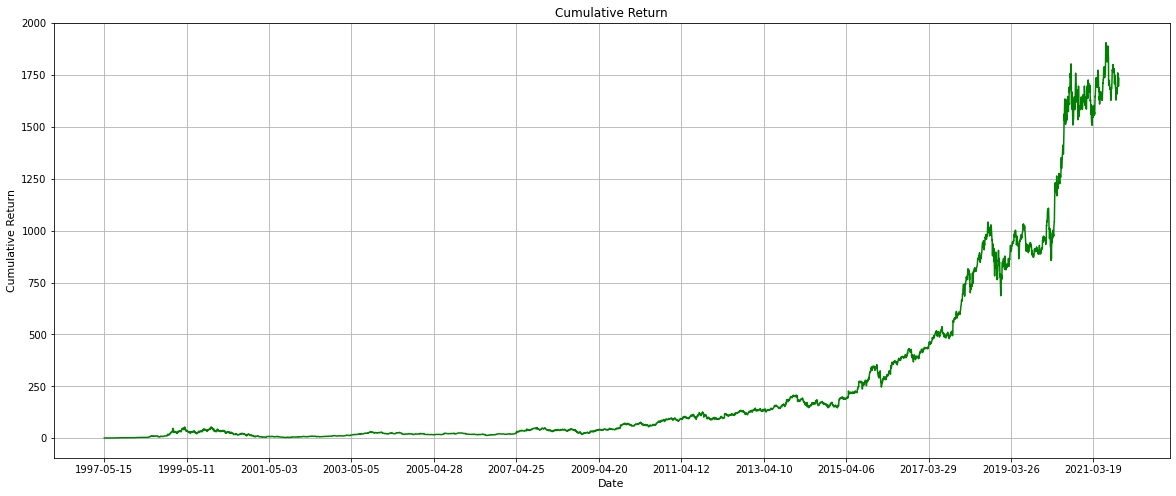

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [24]:
df.iloc[df['Cumulative Return'].argmax()]


Date                         2021-07-08
Open                        3643.560059
High                         3759.98999
Low                         3621.120117
Close                       3731.409912
Adj Close                   3731.409912
Volume                          5180600
Market Cap           18875827241.655399
vol                            0.009422
Cumulative Return            1905.40113
Name: 6076, dtype: object

In [25]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [27]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8) 
training_data_len


4924

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.89802079e-01],
       [9.04734986e-01],
       [9.10129033e-01]])

In [29]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
      print(x_train)
      print(y_train)
      print()

[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [30]:
x_train,y_train = np.array(x_train), np.array(y_train)


In [31]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(4864, 60, 1)

In [32]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
4864/4864 [==============================] - 169s 34ms/step - loss: 5.8920e-05
Epoch 2/10
4864/4864 [==============================] - 167s 34ms/step - loss: 2.1238e-05
Epoch 3/10
4864/4864 [==============================] - 172s 35ms/step - loss: 1.7865e-05
Epoch 4/10
4864/4864 [==============================] - 172s 35ms/step - loss: 1.4958e-05
Epoch 5/10
4864/4864 [==============================] - 169s 35ms/step - loss: 1.2273e-05
Epoch 6/10
4864/4864 [==============================] - 172s 35ms/step - loss: 1.0678e-05
Epoch 7/10
4864/4864 [==============================] - 173s 36ms/step - loss: 9.0794e-06
Epoch 8/10
4864/4864 [==============================] - 174s 36ms/step - loss: 1.0395e-05
Epoch 9/10
4864/4864 [==============================] - 173s 36ms/step - loss: 8.8147e-06
Epoch 10/10
2712/4864 [===============>..............] - ETA: 1:16 - loss: 8.0512e-06

In [ ]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper left')
plt.show()

In [43]:
valid


,Close,Predictions
Date,,
2016-12-07,770.419983,762.085571
2016-12-08,767.330017,766.111450
2016-12-09,768.659973,761.890747
2016-12-12,760.119995,762.983765
2016-12-13,774.340027,754.972046
...,...,...
2021-10-21,3435.010010,2705.774658
2021-10-22,3335.550049,2726.402832
2021-10-25,3320.370117,2653.080566
